<a href="https://colab.research.google.com/github/FredOnBrasil/CienciaDeDados_ETL_Usando_MarcaDagua/blob/main/ETL_UsandoMarcaDagua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

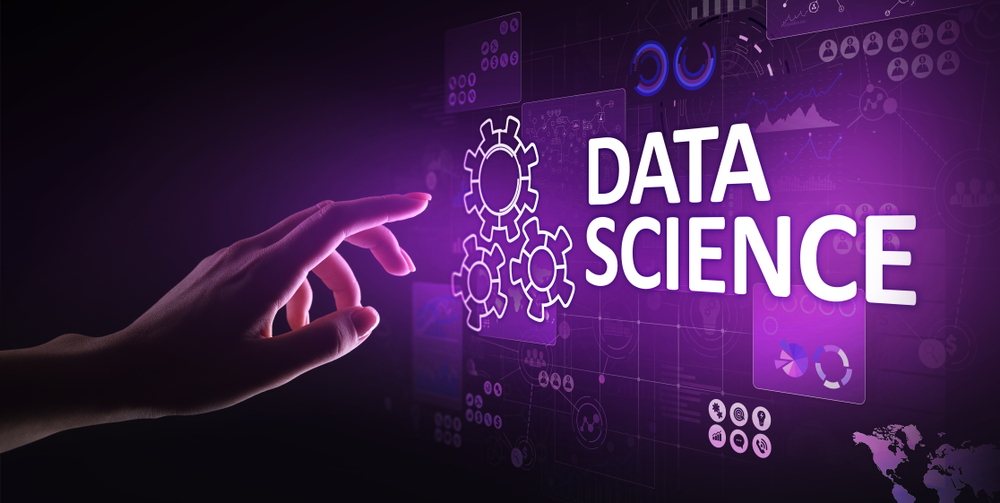

# Contextualizando: ETL para aplicação de marca d'água

**Neste Projeto vamos inserir uma marca dágua em uma imagem usando o processo ETL(Extraction, Transformation e Load - Extração, transformação e carga) para uma imagem. Adicionar uma marca dágua à imagem funciona como uma proteção de copyright de forma que ninguém possa utilizar a imagem sem a devida autorização. Vamos utilizar a biblioteca OpenCv para este fim.**

---

* Começamos o fluxo de ETL importando as bibliotecas necessárias como o OpenCV para processamento de imagens, numpy para processamento matemático, etc.

In [55]:
# Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

# Extração: buscamos uma imagem em um site da internet que possa ser utilizada como teste na extração de informação...

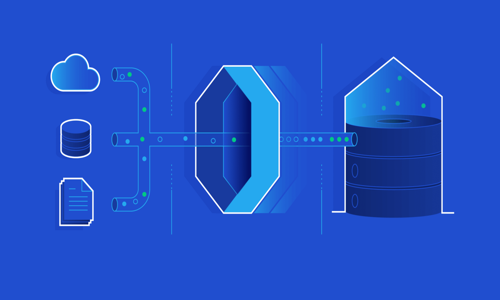

In [62]:
# Lendo imagem a partir de URL
#image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image = Image.open(requests.get('https://assets.toptal.io/images?url=https%3A%2F%2Fbs-uploads.toptal.io%2Fblackfish-uploads%2Fcomponents%2Fblog_post_page%2Fcontent%2Fcover_image_file%2Fcover_image%2F1294610%2Fregular_1708x683_image_1__63_-ccd9f57ba875f009677c550069cfdd64.png', stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

* Utilizamos a imagem acima obtida através de pesquisa no google imagens na qual aplicaremos a marca dágua. Após selecionada a imagem passamos ao redimencionamento.

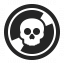

In [63]:
# Lendo a imagem para a marca d'água a partir de uma URL
logo = Image.open(requests.get('https://d1nhio0ox7pgb.cloudfront.net/_img/o_collection_png/green_dark_grey/64x64/plain/cd_pirated.png', stream=True).raw)
logo

* Ainda na etapa de extração utilizamos a imagem acima que será utilizada como marca d'água. Realizamos duas extrações distintas para este processo. A primeira da imagem base relacioanada ao contexto de ETL e a segunda para aplicar a funcionalidade de marca d'água.

---

# Transformation: aqui modificamos a imagem base e aplicamos a marca d'água...

In [64]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

* Para que possamos utilizar estas imagens vamos primeiro convertê-las em formato RGB e armazenar ambas em vetores numpy. Da mesma forma vamos extrair a largura e altura e armazenar.

In [65]:
# Obtendo o centro da imagem inicial onde colocaremos a marca d'água:
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

* No trecho de código abaixo a marca d'água é colocada no centro da imagem e para isso realizamos os cálculos necessários.

In [66]:
# Obtendo o centro da Imagem
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Adicionando o logo
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Desenhando
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Substituindo a imagem de centro
image_logow[top_y: bottom_y, left_x: right_x] = result

* Definimos o centro, plotamos a imagem de logo e adicionamos linhas de limite para destacar.

---

# Load: carregamos a imagem depois de converter para que possa ser vizualizada

* abaixo convertemos a imagem de array para RGB e carregamos para visualização.

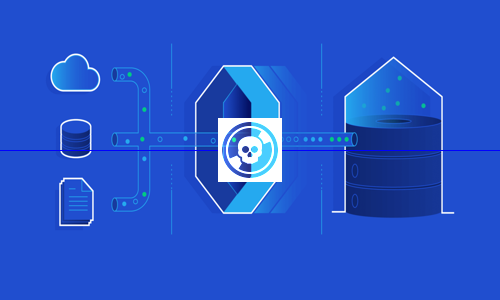

In [67]:
# Plotando a imagem de marca dágua
img = Image.fromarray(image_logow, 'RGB')
img

---

# Alternativa: aqui usamos o processo parecido para inserir uma marca d'água usando texto como  exemplo.

In [53]:
# Marca d'água de texto:
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='DIO Digital Innovation One', org=(w_image - 240, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(0,0,240), thickness=2, lineType=cv2.LINE_4);

* Definimos o texto ***DIO Innovation One*** como marca d'água e convertemos a imagem de RGB para vetor numpy. Para usar a marca d'água de texto usamos a função 'putText()' do OpenCV.

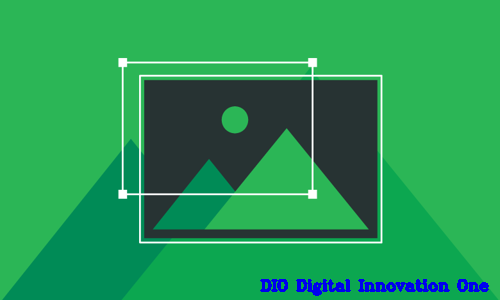

In [54]:
# Plotando o texto como marca d'água
timg = Image.fromarray(image_text, 'RGB')
timg

* Para Visualizar convertemos de array para RGB a imagem.

---

## Conclusão:

Vimos aqui um exemplo alternativo de ETL usando para isso a criação de marca d'água em uma imagem escolhida usando logo e posteriormente texto personalizado. ***Esta solução foi adotada já que a API de exemplo do bootcamp Santander não estava funcionando*** e precisávamos demonstrar o uso de ETL em Data science..

---